movieData = read.csv(r

In [4]:
movieData = pd.read_csv(r"C:\Users\Dell\Desktop\ProjectsPython\Customer Segmentation using Machine Learning in R\k-means-clustering-main\movie.csv")

In [2]:
import pandas as pd

In [8]:
df = pd.DataFrame(movieData)
df.head()

,Horror,Romcom,Action,Comedy,Fantasy
0,72.5,29.9,68.6,40.7,57.9
1,82.2,45.3,76.5,17.4,67.7
2,70.0,44.0,65.1,53.7,37.8
3,99.1,21.0,77.9,25.4,40.3
4,84.0,0.0,68.1,49.8,40.0


In [12]:
!pip install kneed

In [20]:
!pip install scalar

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for scalar: filename=scalar-2018.9.10.2016-py3-none-any.whl size=5862 sha256=000561b5e05ec6c4e3cf7e3b6d15ea208b469a770e42e3f662153030ac61cd21
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\cf\4f\f2\f153b48133f093efcb06ab381f7a3db1c505a0bd09fc7e9b4e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=2d0b708cb0f86f3ebf01d5f7d9ba06b07e68e3317e4ff544a285659147307a2c
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for megaparsex: filename=megaparsex-2018.2.12.2333-py3-none-any.whl size=18646 sha256=24fb6b38901915b223f2fe7af2e272ab6b38ced04ffeeaa553eec8851d9ce1f5
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\1d\ed\5b\1f41220111b33d768f643e7d4d30697f687230317a2e0751d6
  Created wheel for AWRS: filename=AWRS-2019.8.14.1152-py3-none-any.whl size=3336 sha256=4bfcd

In [46]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [16]:
df, true_labels = make_blobs( n_samples=200,centers=3,cluster_std=2.75,random_state=42 )

In [23]:
df[:5]
scaler = StandardScaler()

In [24]:
scaled_features = scaler.fit_transform(df)

In [25]:
scaled_features[:5]

array([[ 0.57263477, -0.07933223, -0.01518384, -0.6999    ,  0.55971087],
       [ 0.97130688,  0.82899545,  0.48205443, -1.73073064,  1.00599602],
       [ 0.46988423,  0.75231844, -0.23547927, -0.12475844, -0.35562908],
       [ 1.66590054, -0.60427485,  0.5701726 , -1.37679737, -0.24178082],
       [ 1.04528727, -1.8429035 , -0.04665461, -0.2973009 , -0.25544261]])

In [31]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [32]:
kmeans.inertia_

555.6589499657723

In [33]:
kmeans.cluster_centers_

array([[ 0.04417251, -0.42567226,  0.3462884 ,  0.50618971, -0.78613526],
       [ 0.90793426, -0.36901967,  0.43230063, -1.1099991 , -0.03655037],
       [-1.3940106 ,  1.21213475, -1.17872838,  0.81728166,  1.29801678]])

In [34]:
kmeans.n_iter_

5

In [36]:
kmeans = KMeans(init="random",  n_clusters=3, n_init=10, max_iter=300, random_state=42 )
kmeans

KMeans(init='random', n_clusters=3, random_state=42)

In [38]:
kmeans = KMeans(3)
kfit = kmeans.fit(df)
identified_clusters = kfit.predict(df)

In [39]:
clustered_data = df.copy()
clustered_data['Cluster'] = identified_clusters

In [40]:
display(clustered_data.sort_values(by='Cluster'))

,Horror,Romcom,Action,Comedy,Fantasy,Cluster
215,59.8,38.8,72.9,59.0,32.9,0
199,55.6,5.2,66.6,45.2,20.2,0
200,48.7,23.8,88.6,65.8,18.1,0
201,67.6,19.7,88.3,93.7,14.3,0
202,59.3,16.4,64.6,47.5,12.8,0
...,...,...,...,...,...,...
71,71.5,29.7,77.3,33.3,25.6,2
72,87.3,14.8,81.5,20.1,43.7,2
73,68.8,56.8,75.1,29.2,50.3,2
75,83.5,38.6,75.6,29.9,29.2,2


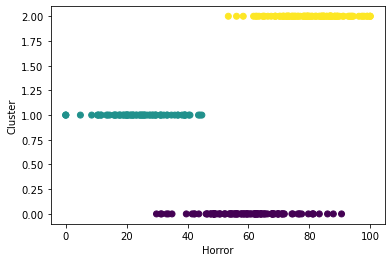

In [41]:
#Plotting the graph
plt.xlabel('Horror')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Horror'],clustered_data['Cluster'],c=clustered_data['Cluster'])

In [42]:
from sklearn import preprocessing

In [44]:
#Passing the values of the dataset to Min-Max-Scaler
movies_values = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(movies_values)
movies_scaled = pd.DataFrame(x_scaled,
columns=df.columns)

In [45]:
#Modeling
kmeans = KMeans(2)
kfit = kmeans.fit(movies_scaled)
identified_clusters_scaled = kfit.predict(movies_scaled)

In [48]:
#Appending the identified clusters to the dataframe
clustered_data_scaled = df.copy()
clustered_data_scaled['Cluster'] = identified_clusters_scaled
display(clustered_data_scaled.sort_values(by='Cluster'))

,Horror,Romcom,Action,Comedy,Fantasy,Cluster
145,24.2,49.9,44.9,50.6,77.0,0
121,28.5,66.7,48.4,86.2,53.1,0
122,14.4,44.9,66.7,62.3,86.9,0
123,27.5,43.4,37.6,63.2,74.9,0
124,24.4,33.7,24.6,80.1,67.8,0
...,...,...,...,...,...,...
23,56.1,20.9,73.8,7.6,23.9,1
22,80.9,17.4,73.4,39.8,44.2,1
21,89.4,25.0,92.1,48.0,36.5,1
31,78.8,0.0,68.9,11.2,51.0,1
